# Implementation des Réseaux de Neurone Artificiel

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs

## Création du Dataset

dimension de X:(100, 2)
dimension de y:(100, 1)


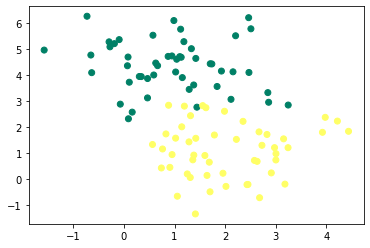

In [41]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
y = y.reshape((y.shape[0], 1))
               
print(f'dimension de X:{X.shape}')
print(f'dimension de y:{y.shape}')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer');

## Création de la fonction d'initialisation
![image](84.png)

In [42]:
def initialisation(x):
    w = np.random.randn(x.shape[1], 1)
    b = np.random.randn(1)
    return (w, b)

## Testons la Fonction d'Initialisation

In [43]:
w, b = initialisation(X)
print(f'La taille de w: {w.shape}')
print(f'La taille de b: {b.shape}')

print(f'w: {w}\nb:{b}')

La taille de w: (2, 1)
La taille de b: (1,)
w: [[ 0.86750878]
 [-1.23279015]]
b:[0.89651975]


## Création du Modèle
![image](model.png)

### Création de la Fonction Sigmoïd

In [44]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [45]:
def model(x, w, b):
    Z = x.dot(w) + b
    A = sigmoid(Z)
    return A

## Testons le Modèle

In [46]:
A = model(X, w, b)
print(f'Shape de A: {A.shape}')
A

Shape de A: (100, 1)


array([[8.58370231e-01],
       [7.53460162e-01],
       [3.65674858e-03],
       [1.31189799e-01],
       [9.01388990e-01],
       [2.20218815e-01],
       [3.58546188e-02],
       [8.04688020e-01],
       [2.85937228e-02],
       [8.48894504e-01],
       [1.70101874e-02],
       [8.24579448e-01],
       [1.00953407e-02],
       [1.19695087e-02],
       [5.86883288e-01],
       [9.22435345e-01],
       [9.79797646e-01],
       [2.40720872e-02],
       [7.31122899e-01],
       [5.59753423e-01],
       [1.99573069e-02],
       [1.98065229e-02],
       [2.74693350e-01],
       [3.38999273e-03],
       [9.03634713e-01],
       [1.53987702e-02],
       [8.74965569e-01],
       [3.15779429e-03],
       [2.68958480e-02],
       [5.48947781e-01],
       [9.62842863e-01],
       [2.02845210e-02],
       [6.34247088e-01],
       [9.63169610e-01],
       [2.52673846e-01],
       [8.96584154e-02],
       [7.20837874e-01],
       [3.54677610e-01],
       [2.58936623e-01],
       [4.34747933e-01],


## La Fonction Coût de Notre Modèle
![image](fonction_cout.png)

In [47]:
def log_loss(A, y):
    L = (-1/len(y)) * np.sum(y * np.log(A) + (1-y) * np.log(1-A))
    return L

In [48]:
loss = log_loss(A, y)

In [49]:
loss

0.2481735174871172

## Les Gradients de Notre Modèle
![image](gradients.png)

In [50]:
def gradients(X, A, y):
    dw = (1 / len(y)) * np.dot(X.T, (A-y))
    db = (1 / len(y)) * np.sum( A - y )
    
    return (dw, db)

## Testons les Gradients

In [52]:
dw, db = gradients(X, A, y)
print(f'Shape de dw: {dw.shape}\ndb: {db}')

Shape de dw: (2, 1)
db: -0.1065889058374197


In [53]:
dw

array([[-0.15614589],
       [-0.13558757]])

## Mise à Jour des Gradients

![image](update.png)

In [54]:
def update(dw, db, b, learning_rate):
    w = w + learning_rate * dw
    b = b + learning_rate * db
    
    return (w, b)